
Total contours detected: 4

Contour 1:
  Shape: Circle/Ellipse
  Vertices: 8
  Area: 3127.00 pixels²
  Perimeter: 219.48 pixels
  Bounding Box: (67, 267) to (134, 334)
  Dimensions: 67x67 pixels

Contour 2:
  Shape: Rectangle
  Vertices: 4
  Area: 15000.00 pixels²
  Perimeter: 500.00 pixels
  Bounding Box: (200, 250) to (351, 351)
  Dimensions: 151x101 pixels

Contour 3:
  Shape: Circle/Ellipse
  Vertices: 8
  Area: 7704.00 pixels²
  Perimeter: 329.71 pixels
  Bounding Box: (250, 50) to (351, 151)
  Dimensions: 101x101 pixels

Contour 4:
  Shape: Square
  Vertices: 4
  Area: 10000.00 pixels²
  Perimeter: 400.00 pixels
  Bounding Box: (50, 50) to (151, 151)
  Dimensions: 101x101 pixels


1. Original Image:


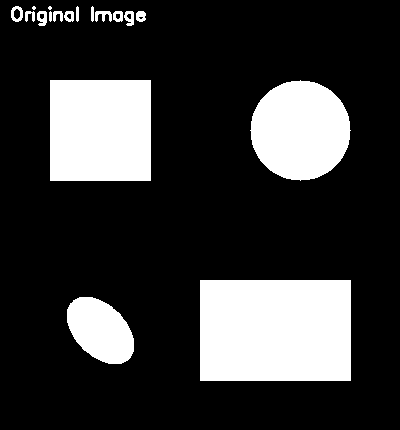


2. Binary Threshold:


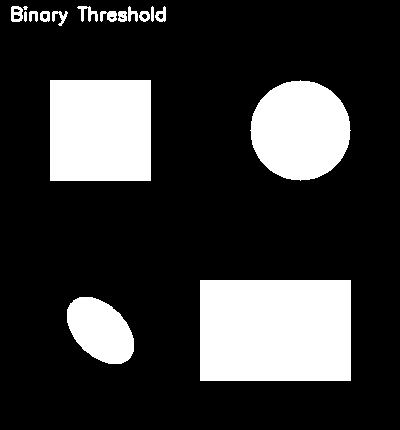


3. Contour Detection (Green=Contours, Blue=BBox, Red=Centroids):


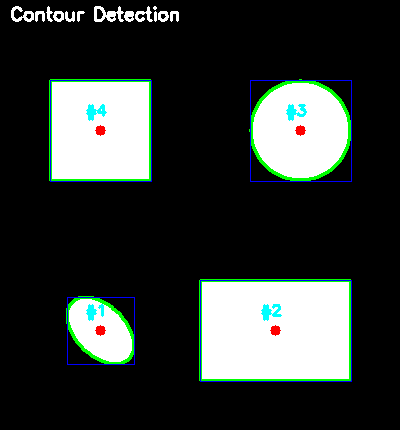

In [1]:

import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Remove if not using Colab
from typing import Tuple, List

def create_test_image(width: int = 400, height: int = 400) -> np.ndarray:
    """Create a test image with various geometric shapes."""
    image = np.zeros((height, width, 3), dtype=np.uint8)

    # Draw shapes with different geometries
    cv2.rectangle(image, (50, 50), (150, 150), (255, 255, 255), -1)   # Square
    cv2.circle(image, (300, 100), 50, (255, 255, 255), -1)            # Circle
    cv2.rectangle(image, (200, 250), (350, 350), (255, 255, 255), -1) # Rectangle
    cv2.ellipse(image, (100, 300), (40, 25), 45, 0, 360, (255, 255, 255), -1)  # Ellipse

    return image

def preprocess_image(image: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """Convert image to grayscale and apply thresholding."""
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Using Otsu's thresholding for automatic threshold selection
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return gray, thresh

def analyze_contours(contours: List[np.ndarray]) -> None:
    """Analyze and print detailed information about detected contours."""
    print(f"\n{'='*60}")
    print(f"Total contours detected: {len(contours)}")
    print(f"{'='*60}\n")

    for idx, contour in enumerate(contours):
        # Calculate contour properties
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)

        # Get bounding rectangle
        x, y, w, h = cv2.boundingRect(contour)

        # Approximate contour to polygon
        epsilon = 0.02 * perimeter
        approx = cv2.approxPolyDP(contour, epsilon, True)

        # Determine shape based on vertices
        vertices = len(approx)
        if vertices == 3:
            shape = "Triangle"
        elif vertices == 4:
            aspect_ratio = float(w) / h
            shape = "Square" if 0.95 <= aspect_ratio <= 1.05 else "Rectangle"
        elif vertices > 4:
            shape = "Circle/Ellipse"
        else:
            shape = "Complex"

        print(f"Contour {idx + 1}:")
        print(f"  Shape: {shape}")
        print(f"  Vertices: {vertices}")
        print(f"  Area: {area:.2f} pixels²")
        print(f"  Perimeter: {perimeter:.2f} pixels")
        print(f"  Bounding Box: ({x}, {y}) to ({x+w}, {y+h})")
        print(f"  Dimensions: {w}x{h} pixels\n")

def draw_enhanced_contours(image: np.ndarray, contours: List[np.ndarray]) -> np.ndarray:
    """Draw contours with additional visual information."""
    result = image.copy()

    # Draw all contours in green
    cv2.drawContours(result, contours, -1, (0, 255, 0), 2)

    # Add bounding boxes and labels
    for idx, contour in enumerate(contours):
        # Bounding rectangle
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(result, (x, y), (x + w, y + h), (255, 0, 0), 1)

        # Calculate centroid
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cx = int(M["m10"] / M["m00"])
            cy = int(M["m01"] / M["m00"])

            # Draw centroid
            cv2.circle(result, (cx, cy), 5, (0, 0, 255), -1)

            # Add label
            cv2.putText(result, f"#{idx+1}", (cx - 15, cy - 15),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)

    return result

def display_results(original: np.ndarray, thresh: np.ndarray, contour_img: np.ndarray) -> None:
    """Display all images with titles."""
    # Add titles to images
    original_titled = cv2.copyMakeBorder(original, 30, 0, 0, 0, cv2.BORDER_CONSTANT, value=(0, 0, 0))
    cv2.putText(original_titled, "Original Image", (10, 20),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    thresh_colored = cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)
    thresh_titled = cv2.copyMakeBorder(thresh_colored, 30, 0, 0, 0, cv2.BORDER_CONSTANT, value=(0, 0, 0))
    cv2.putText(thresh_titled, "Binary Threshold", (10, 20),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    contour_titled = cv2.copyMakeBorder(contour_img, 30, 0, 0, 0, cv2.BORDER_CONSTANT, value=(0, 0, 0))
    cv2.putText(contour_titled, "Contour Detection", (10, 20),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    print("\n1. Original Image:")
    cv2_imshow(original_titled)

    print("\n2. Binary Threshold:")
    cv2_imshow(thresh_titled)

    print("\n3. Contour Detection (Green=Contours, Blue=BBox, Red=Centroids):")
    cv2_imshow(contour_titled)

def main():
    """Main execution function."""
    # Create test image
    image = create_test_image()

    # Preprocess
    gray, thresh = preprocess_image(image)

    # Find contours
    contours, hierarchy = cv2.findContours(
        thresh,
        cv2.RETR_EXTERNAL,  # Only external contours
        cv2.CHAIN_APPROX_SIMPLE  # Compress contours
    )

    # Analyze contours
    analyze_contours(contours)

    # Draw enhanced visualization
    contour_image = draw_enhanced_contours(image, contours)

    # Display results
    display_results(image, thresh, contour_image)

    # Cleanup (not needed in Colab)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()
